## Исследование тарифов мобильного оператора "Мегалайн"

"Мегалайн" - федеральный оператор сотовой связи. Неоходимо проанализировать два тарифных плана - "Смарт" и "Ультра" - для определения более прибыльного. В дальнейшем расчеты будут использованы для корректировки рекламного бюджета.
Заказчиком предоставлены данные о 500 пользователях за 2018 год. В выборке фигурируют следующие тарифные планы:

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
-	минута разговора: 3 рубля
-	сообщение: 3 рубля
-	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
-	минута разговора: 1 рубль
-	сообщение: 1 рубль
-	1 Гб интернет-трафика: 150 рублей

(Примечание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. )

Исходная информация представлена в 5 таблицах: users, calls, internet, messages, tariffs.

#### Структура исследования

1) <a href='#info1'>Общая информация</a>

- <a href='#info2'>Вывод</a>

2) <a href='#info3'>Предобработка данных</a>

- <a href='#info4'>Вывод</a>

3) <a href='#info5'>Подготовка данных для анализа. Группировка по месяцам.</a>

- <a href='#info6'>Вывод</a>

4) <a href='#info7'>Анализ поведения клиентов </a>

- <a href='#info8'>Голосовая связь</a>
- <a href='#info9'>Сообщения</a>
- <a href='#info10'>Интернет</a>
- <a href='#info11'>Вывод</a>

5) <a href='#info12'>Проверка гипотез</a>

- <a href='#info13'>Вывод</a>

6) <a href='#info14'>Общий вывод</a>





### 1. Общая информация <a id=info1></a>

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')

Информация представлена в 5 таблицах. Рассмотрим их по-порядку.

Таблица **users**:

In [3]:

print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице users содержатся следующие данные:
-	user_id — уникальный идентификатор пользователя
-	first_name — имя пользователя
-	last_name — фамилия пользователя
-	age — возраст пользователя (годы)
-	reg_date — дата подключения тарифа (день, месяц, год)
-	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
-	city — город проживания пользователя
-	tariff — название тарифного плана

Количество записей - 500.
На первый взгляд во фрейме выделяются следующие проблемы:
- наличие пропусков в столбце churn_date
- reg_date необходимо перевести в формат datetime

Рассмотрим фрейм на наличие иных проблем с данными.

In [4]:
#создаём функцию для получения краткой информации по столбцу
def first_glance(frame, column, plot_name): # 3 аргумента - название фрейма, название столбца, подпись для диаграммы
    print('Базовое описание:')
    print(frame[column].describe())
    print()
    print('Количество пропусков:',frame[frame[column].isna()][column].count())
    print()
    print('Уникальные значения столбца')
    print(frame[column].unique())
    print()
    #if frame.dtypes[column] == np.object:
    print(frame[column].value_counts().head(10))
    print()
    frame[column].hist(bins = 100)
    plt.title(plot_name)
    plt.show()

Базовое описание:
count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Количество пропусков: 0

Уникальные значения столбца
[52 41 59 23 68 67 21 65 63 24 26 44 38 36 64 58 73 71 61 72 42 56 32 62
 20 51 28 66 31 37 47 40 69 48 33 39 43 46 45 55 53 34 49 25 18 70 50 19
 54 60 29 27 74 22 30 75 57 35]

53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
Name: age, dtype: int64



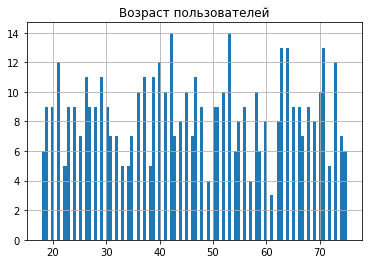

In [5]:
first_glance(users, 'age', 'Возраст пользователей')

В столбце "age" не обнаружено проблем с данными. Выборка распределена довольно равномерно без преобладания конкретной возрастной группы.

Рассмотрим распределение клиентов по городам присутствия:

Базовое описание:
count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object

Количество пропусков: 0

Уникальные значения столбца
['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новоросси

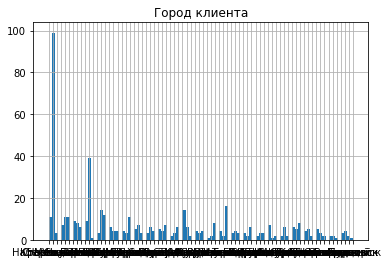

In [6]:
first_glance(users, 'city', 'Город клиента')

В столбце 'city' проблем не обнаружено.  Среди названий городов нет дубликатов, вызванных ручным вводом наименований. Заметно, что пользователи Москвы составляют 20% пользователей.
Посмотрим распределение пользователей по тарифам:

In [7]:
print(users['tariff'].value_counts())
print('Доля клиентов на тарифе Ультра: {:.2%}'.format(
    users[users['tariff'] == 'ultra']['tariff'].count()/len(users['tariff'])))

smart    351
ultra    149
Name: tariff, dtype: int64
Доля клиентов на тарифе Ультра: 29.80%


Мы видим, что большая часть пользователей (70,2%) в выборке предпочитает тариф smart. При этом не ошибок в данных не выявлено.

Проверим столбец **churn_date**. В нём заполнено только 38 значений. Это клиенты, которые прекратили пользоваться тарифом. Возможно, что данные клиенты не являются уникальными в данной выборке и позднее перешли на другой тариф. Произведем проверку данной гипотезы.

In [8]:
family_name = users[users['churn_date'].isna() == False]['last_name']
family_name_list = family_name.unique().tolist()

In [9]:
def stop_tarif(name):
    if name in family_name_list:
        return True
    else:
        return False

In [10]:
users['stopped_tarif'] = users['last_name'].apply(stop_tarif)

In [11]:
stopped = users.query('stopped_tarif == True')
stopped_names = stopped['first_name'] + stopped['last_name']
print(stopped_names.value_counts().head())

ВсеволодАнтоненко    1
ЕленаШарапова        1
АлисаАбрашина        1
ЭдитаДубинина        1
АртёмФедосеев        1
dtype: int64


Проверка показала, что такие пользователи уникальны.

Таким образом, в таблице **users** можно выделить только 2 основные проблемы, которые были предположены ранее:
- наличие пропусков в столбце churn_date
- reg_date необходимо перевести в формат datetime

Перейдём к таблице с данными о звонках (**calls**). В ней содержатся следующие данные:
-	id — уникальный номер звонка
-	call_date — дата звонка
-	duration — длительность звонка в минутах
-	user_id — идентификатор пользователя, сделавшего звонок


In [12]:

print(calls.info())
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Количество значений в таблице **calls** - 202607.
Первичный анализ не обнаружил в таблице **calls** пропусков. Можно выделить следующие проблемы фрейма:
- столбец **call_date** не в формате datetime
- длительность звонков **duration** приведена в формате float
- наличие нулевых значений в длительности звонков

Подробнее исследуем столбец **duration**.

Базовое описание:
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Количество пропусков: 0

Уникальные значения столбца
[ 0.    2.85 13.8  ... 24.36 24.5  26.9 ]

0.00    39613
4.49      142
5.50      142
6.15      141
6.38      141
4.92      139
8.41      138
5.45      138
5.05      138
5.25      137
Name: duration, dtype: int64



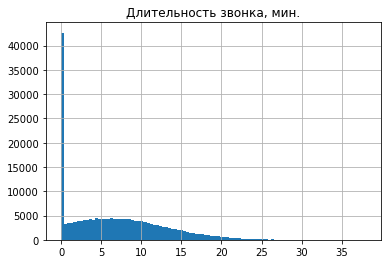

In [13]:
first_glance(calls, 'duration', 'Длительность звонка, мин.')

In [14]:
print('Доля нулевых значений: {:.2%}'.format(calls[calls['duration'] == 0]['user_id'].count()/len(calls['duration'])))

Доля нулевых значений: 19.55%


Нулевые значения в длительности звонков занимают почти 20% всех записей. Можно предположить, что это звонки при которых не произошло соединения или т.н. "дозвоны", на которые не начисляется тарификация. 
С учетом этих данных средняя длительность звонка составляет 6,75 мин., а медиана - 6 минут ровно. Рассмотрим характеристики выборки без учета нулевых значений.

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64


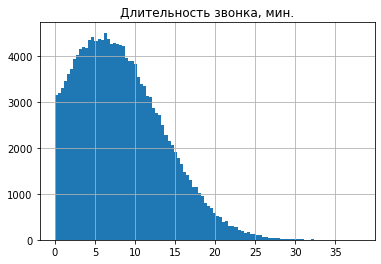

In [15]:
print(calls[calls['duration'] != 0]['duration'].describe())
# выведем гистограмму для ненулевой длительности звонка
calls[calls['duration'] != 0]['duration'].hist(bins = 100)
plt.title('Длительность звонка, мин.')
plt.show()

Если рассматривать выборку без нулевых значений, то средняя длительность звонка вырастает на **1,64** минуты, а медианное значение теперь находится на уровне **7.74** мин. (увеличение на 1.74 мин.)
Таким образом, нулевые звонки оказывают существенное влияние на характеристики выборки. Они искажают реальную длительность совершенных звонков, однако нельзя полностью исключать их из расчета, так как они являются одной из характеристик поведения клиентов.
В рамках данных заключений можно предложить следующую концепцию: использовать для расчета эффективности тарифов только ненулевые звонки, но при этом учесть их в среднемесячном количестве совершаемых звонков.

Рассмотрим далее информацию о сообщениях в таблице **messages**.
В ней содержатся следующие данные:
-	id — уникальный номер сообщения
-	message_date — дата сообщения
-	user_id — идентификатор пользователя, отправившего сообщение

In [16]:

print(messages.info())
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Количество значений в таблице **messages** - 123036.
В таблице не выявлено пропусков, однако для дальнейшей обработки необходимо перевести столбец **"message_date"** в формат datetime.

Рассмотрим информацию об интернет-трафике (таблица **internet**). Она содержит следующие данные:
-	id — уникальный номер сессии
-	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
-	session_date — дата интернет-сессии
-	user_id — идентификатор пользователя


In [17]:

print(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице обнаружен столбец **Unnamed: 0**, который, возможно, является перенесённым индексом из другой таблицы. Данный столбец не несёт смысловой нагрузки и не был указан в документации.
Первоначально выявленные проблемы:
- столбец **session_date** не в формате datetime
- отсутствие округления в информации о количестве использованных мегабайт **mb_used**

Рассмотрим подробнее информацию об использованном трафике:

Базовое описание:
count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Количество пропусков: 0

Уникальные значения столбца
[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
513.25        8
199.11        8
292.14        8
466.85        8
304.20        8
Name: mb_used, dtype: int64



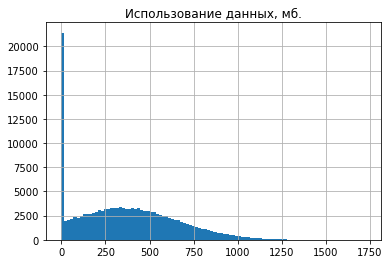

In [18]:
first_glance(internet, 'mb_used', 'Использование данных, мб.')

In [19]:
print('Доля нулевых значений: {:.2%}'.format(
    internet[internet['mb_used'] == 0]['user_id'].count()/len(internet['mb_used'])))

Доля нулевых значений: 13.12%


В 13% случаев соединение не сопровождалось передачей данных. С учетом этих данных среднее количество данных за сессию **370.19** мб. Медианное значение - **348** мб.

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64


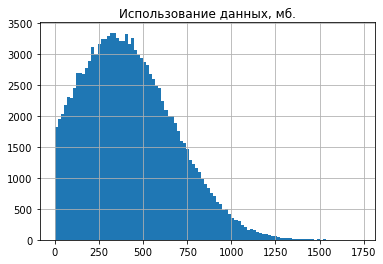

In [20]:
print(internet[internet['mb_used'] != 0]['mb_used'].describe())
#вывод диаграммы для ненулевого количества мегабайт
internet[internet['mb_used'] != 0]['mb_used'].hist(bins = 100)
plt.title('Использование данных, мб.')
plt.show()

Отсутствие нулевых данных средняя сессия составляет **426** мб, что на 56 мб. больше, чем в предыдущих расчетах. Медиана проходит на уровне **400** мб., что на 52 мб. больше, чем с учетом нулевых значений. 
Поскольку в системе производится округление передаваемой информации до 1 мб и только ненулевые данные используются для в расчете затрат клиента, то считаем возможным **исключить** нулевые данные из дальнейших расчетов.

Рассмотрим таблицу с информацией о тарифах. В ней агрегированы характеристики двух предлагаемых нам тарифов - Смарт и Ультра:

In [21]:

print(tariffs.info())
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице всего 2 строки, содержащие вспомогательную информацию для дальнейших расчетов. Ошибок в данном фрейме не выявлено.

### Вывод <a id = info2></a>

Представленная информация находится в 5 таблицах: users, calls, messages, internet, tariffs. Информация является достаточно качественной и не требует большого количества предобработки.

#### Незначительные ошибки в данных

- столбцы **'session_date' (internet), 'message_date' (messages), 'call_date' (calls), 'reg_date' (users)** - необходимо привести в формат datetime
- столбец **Unnamed: 0** из фрейма **internet** - столбец к удалению. Возможно, что данный столбец возник в результате переноса данных из иного фрейма.

#### Существенные ошибки в данных
- пропуски в столбце **churn_date** фрейма users. На момент выгрузки выборки контракт данных пользователей был активен. Поскольку данная информация не используется в расчетах считаем возможным 2 варианта:

1) не заполнять данные пропуски либо заполнить пустыми значениями
2) заполнить пропуски значением 31-12-2018 - последний день года, взятого в выгрузке

- нулевые значения в столбце **'duration'** фрейма calls - составляют около 20% от всего фрейма. В связи с существенным влиянием этих данных на выборку (изменение среднего и медианы на 1.64 и 1.74 мин. соответственно), полагаем, что для расчета количественных значений следует использовать полную выборку, а для объемных - выборку с отброшенными нулевыми показателями.
- нулевые значения в столбце **mb_used** фрейма internet - около 13% от общей выборки. Возможно, что оператор не учитывает соединения с определенными адресами при учете трафика. Поскольку в тарифах не учитывается количество сессий, а только фактическая передача данных, и заполнение медианными/средними значениями окажет существенное влияние на выборку, полагаем возможным **исключить** нулевые сессии из дальнейших расчетов.

#### Дополнительные задачи

- округлить вверх значения столбцов **duration, mb_used** для расчетов использованного трафика и минут по тарифам


### 2. Предобработка данных <a id=info3></a>

Переходим к предобработке данных. 

1. Установим формат datetime для столбцов **'session_date' (internet), 'message_date' (messages), 'call_date' (calls), 'reg_date' (users)**.

Данные в этих столбцах представлены по единому шаблону - yyyy-mm-dd.

In [22]:
#приводим столбцы нескольких фреймов в формат datetime.
internet['session_date'] = pd.to_datetime(internet['session_date'],format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

Данные в столбцах приведены в нужный формат и готовы к дальнейшей обработке.

2. Удалим лишний столбец из таблицы internet.

In [23]:
internet = internet.drop(columns = ['Unnamed: 0'])
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Лишний столбец удалён.

3. Столбец 'churn_date' фрейма users. Поскольку данный столбец не используется в дальнейших расчетах и его незаполнение связано с тем, что контракт был еще активен, считаем возможным заполнить его пустыми значениями.

In [24]:
users['churn_date'] = users['churn_date'].fillna(value='')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,stopped_tarif
0,1000,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
1,1001,41,,Москва,Иван,Ежов,2018-11-01,smart,False
2,1002,59,,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,False
3,1003,23,,Москва,Белла,Белякова,2018-08-17,ultra,False
4,1004,68,,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,False


Данное решение не являлось бы оптимальным, если бы был необходим расчет длительности контракта, однако на текущий момент считаем возможным оставить его в таком состоянии.

4. Добавим столбцы с округлением объема трафика и длительности звонков во фреймы calls и internet.

In [25]:
calls['duration_round'] = calls['duration'].apply(np.ceil)
internet['mb_round'] = internet['mb_used'].apply(np.ceil)
print(calls.head())
print()
print(internet.head())

       id  call_date  duration  user_id  duration_round
0  1000_0 2018-07-25      0.00     1000             0.0
1  1000_1 2018-08-17      0.00     1000             0.0
2  1000_2 2018-06-11      2.85     1000             3.0
3  1000_3 2018-09-21     13.80     1000            14.0
4  1000_4 2018-12-15      5.18     1000             6.0

       id  mb_used session_date  user_id  mb_round
0  1000_0   112.95   2018-11-25     1000     113.0
1  1000_1  1052.81   2018-09-07     1000    1053.0
2  1000_2  1197.26   2018-06-25     1000    1198.0
3  1000_3   550.27   2018-08-22     1000     551.0
4  1000_4   302.56   2018-09-24     1000     303.0


In [26]:
#Приводим данные в столбцах с округлением к формату int
calls['duration_round'] = calls['duration_round'].astype('int64')
internet['mb_round'] = internet['mb_round'].astype('int64')

Обработка данных завершена.

5. Сформируем дополнительные фреймы для ненулевых значений по трафику и длительности звонка.

In [27]:
internet_no_zero = internet.query('mb_used != 0')
calls_no_zero = calls.query('duration != 0')
internet_no_zero.reset_index(drop = True, inplace = True)
calls_no_zero.reset_index(drop = True, inplace = True)

In [28]:
print(internet_no_zero.head())
print()
print(internet_no_zero.info())

       id  mb_used session_date  user_id  mb_round
0  1000_0   112.95   2018-11-25     1000       113
1  1000_1  1052.81   2018-09-07     1000      1053
2  1000_2  1197.26   2018-06-25     1000      1198
3  1000_3   550.27   2018-08-22     1000       551
4  1000_4   302.56   2018-09-24     1000       303

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
 4   mb_round      129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.0+ MB
None


In [29]:
print(calls_no_zero.head())
print()
print(calls_no_zero.info())

       id  call_date  duration  user_id  duration_round
0  1000_2 2018-06-11      2.85     1000               3
1  1000_3 2018-09-21     13.80     1000              14
2  1000_4 2018-12-15      5.18     1000               6
3  1000_7 2018-08-22     18.31     1000              19
4  1000_8 2018-09-15     18.44     1000              19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              162994 non-null  object        
 1   call_date       162994 non-null  datetime64[ns]
 2   duration        162994 non-null  float64       
 3   user_id         162994 non-null  int64         
 4   duration_round  162994 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 6.2+ MB
None


Были созданы два новых фрейма calls_no_zero и internet_no_zero. В них содержатся данные без нулевых значений по длительности звонка и переданных данных в интернет-соединении.

### Вывод <a id=info4></a>

В ходе предобработки данных были сделаны следующие корректировки:
1. Установлен формат datetime для столбцов **'session_date' (internet), 'message_date' (messages), 'call_date' (calls), 'reg_date' (users)**
2. Убран лишний столбец во фрейме internet
3. Заполнены пропуски столбца 'churn_date'
4. Добавлены столбцы 'duration_round' и 'mb_round'
5. Созданы два дополнительных фрейма 'calls_no_zero' и 'internet_no_zero'

### 3. Подготовка данных для анализа. Группировка по месяцам. <a id=info5></a>

Для оценки поведения клиентов подготовим данные в разбивке по месяцам. Добавим во фреймы calls, messages, internet, internet_no_zero, calls_no_zero.

In [30]:
calls['month'] = calls['call_date'].dt.month
calls_no_zero['month'] = calls_no_zero['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
internet_no_zero['month'] = internet_no_zero['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [31]:
internet.head(3)

,id,mb_used,session_date,user_id,mb_round,month
0,1000_0,112.95,2018-11-25,1000,113,11
1,1000_1,1052.81,2018-09-07,1000,1053,9
2,1000_2,1197.26,2018-06-25,1000,1198,6


In [32]:
internet_no_zero.head()

,id,mb_used,session_date,user_id,mb_round,month
0,1000_0,112.95,2018-11-25,1000,113,11
1,1000_1,1052.81,2018-09-07,1000,1053,9
2,1000_2,1197.26,2018-06-25,1000,1198,6
3,1000_3,550.27,2018-08-22,1000,551,8
4,1000_4,302.56,2018-09-24,1000,303,9


In [33]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


В каждую из таблиц было добавлено по столбцу, соответствующему номеру месяца. Произведём группировку в данных фреймах по двум показателям - id клиента и номер месяца.

In [34]:
messages_pivot = pd.pivot_table(messages, index = ['user_id', 'month'], values = ['id'], aggfunc = 'count')
messages_pivot.head(15)

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
        10     73
        11     58
        12     70
1002    6       4
        7      11
        8      13
        9       4
        10     10
        11     16
        12     12

Сформируем аналогичные таблицы для других фреймов.

In [35]:
internet_pivot = pd.pivot_table(
    internet, index = ['user_id', 'month'], values = ['mb_used', 'mb_round'], aggfunc = {'mb_used':['sum', 'count'],
                                                                                        'mb_round': 'sum'})
internet_pivot.columns = ['mb_round_sum', 'mb_used_count', 'mb_used_sum']
internet_pivot.head()

mb_round_sum  mb_used_count  mb_used_sum
user_id month                                          
1000    5              2256              5      2253.49
        6             23257             49     23233.77
        7             14016             29     14003.64
        8             14070             29     14055.93
        9             14581             27     14568.91

In [36]:
int_no_zero_pivot = pd.pivot_table(
    internet_no_zero, index = ['user_id', 'month'], values = ['mb_used', 'mb_round'], aggfunc = {'mb_used':['sum', 'count'],
                                                                                        'mb_round': 'sum'})
int_no_zero_pivot.columns = ['mb_round_sum', 'mb_used_count', 'mb_used_sum']
int_no_zero_pivot.head()

mb_round_sum  mb_used_count  mb_used_sum
user_id month                                          
1000    5              2256              4      2253.49
        6             23257             44     23233.77
        7             14016             28     14003.64
        8             14070             27     14055.93
        9             14581             25     14568.91

In [37]:
calls_pivot = pd.pivot_table(
    calls, index = ['user_id', 'month'], values = ['duration', 'duration_round'], aggfunc = {'duration':['sum', 'count'],
                                                                                        'duration_round': 'sum'})

calls_pivot.head()

duration         duration_round
                 count     sum            sum
user_id month                                
1000    5           22  150.06            159
        6           43  158.90            172
        7           47  318.80            340
        8           52  389.87            408
        9           58  440.14            466

In [38]:
calls_no_zero_pivot = pd.pivot_table(
    calls_no_zero, index = ['user_id', 'month'], values = ['duration', 'duration_round'], aggfunc = {'duration':['sum', 'count'],
                                                                                        'duration_round': 'sum'})
calls_no_zero_pivot.columns = ['calls_no_zero_count', 'calls_sum', 'calls_round_sum']
calls_no_zero_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3168 entries, (1000, 5) to (1499, 12)
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   calls_no_zero_count  3168 non-null   int64  
 1   calls_sum            3168 non-null   float64
 2   calls_round_sum      3168 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 87.6 KB


Построим единую таблицу из сформированных сводных.

In [39]:
#строим новый фрейм на основе копии самой объемной из группипровок
united_table = calls_pivot.copy()
united_table = united_table.merge(messages_pivot[['id']], on = ['user_id', 'month'], how = 'outer')
united_table.columns = ['calls_count', 'duration_sum', 'duration_round_sum', 'messages_count']
united_table.head()

calls_count  duration_sum  duration_round_sum  messages_count
user_id month                                                               
1000    5             22.0        150.06               159.0            22.0
        6             43.0        158.90               172.0            60.0
        7             47.0        318.80               340.0            75.0
        8             52.0        389.87               408.0            81.0
        9             58.0        440.14               466.0            57.0

In [40]:
united_table = united_table.merge(calls_no_zero_pivot[['calls_no_zero_count']], on = ['user_id', 'month'], how = 'left')
united_table.head()

calls_count  duration_sum  duration_round_sum  messages_count  \
user_id month                                                                  
1000    5             22.0        150.06               159.0            22.0   
        6             43.0        158.90               172.0            60.0   
        7             47.0        318.80               340.0            75.0   
        8             52.0        389.87               408.0            81.0   
        9             58.0        440.14               466.0            57.0   

               calls_no_zero_count  
user_id month                       
1000    5                     17.0  
        6                     28.0  
        7                     41.0  
        8                     42.0  
        9                     46.0

In [41]:
#вытаскиваем нужные столбцы из других таблиц через merge
united_table = united_table.merge(internet_pivot[
    ['mb_round_sum', 'mb_used_sum']],on = ['user_id', 'month'], how = 'outer')
united_table = united_table.merge(int_no_zero_pivot[
    ['mb_used_count']],on = ['user_id', 'month'], how = 'outer')
united_table.head()

calls_count  duration_sum  duration_round_sum  messages_count  \
user_id month                                                                  
1000    5             22.0        150.06               159.0            22.0   
        6             43.0        158.90               172.0            60.0   
        7             47.0        318.80               340.0            75.0   
        8             52.0        389.87               408.0            81.0   
        9             58.0        440.14               466.0            57.0   

               calls_no_zero_count  mb_round_sum  mb_used_sum  mb_used_count  
user_id month                                                                 
1000    5                     17.0        2256.0      2253.49            4.0  
        6                     28.0       23257.0     23233.77           44.0  
        7                     41.0       14016.0     14003.64           28.0  
        8                     42.0       14070.0     14055.93           27.0  
        9                     46.0       14581.0     14568.91           25.0

In [42]:
united_table = united_table.reset_index().merge(users, on = 'user_id', how = 'left')

In [43]:
united_table.head()

,user_id,month,calls_count,duration_sum,duration_round_sum,messages_count,calls_no_zero_count,mb_round_sum,mb_used_sum,mb_used_count,age,churn_date,city,first_name,last_name,reg_date,tariff,stopped_tarif
0,1000,5,22.0,150.06,159.0,22.0,17.0,2256.0,2253.49,4.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
1,1000,6,43.0,158.90,172.0,60.0,28.0,23257.0,23233.77,44.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
2,1000,7,47.0,318.80,340.0,75.0,41.0,14016.0,14003.64,28.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
3,1000,8,52.0,389.87,408.0,81.0,42.0,14070.0,14055.93,27.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
4,1000,9,58.0,440.14,466.0,57.0,46.0,14581.0,14568.91,25.0,52,,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False


In [44]:
united_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              3214 non-null   int64         
 1   month                3214 non-null   int64         
 2   calls_count          3174 non-null   float64       
 3   duration_sum         3174 non-null   float64       
 4   duration_round_sum   3174 non-null   float64       
 5   messages_count       2717 non-null   float64       
 6   calls_no_zero_count  3168 non-null   float64       
 7   mb_round_sum         3203 non-null   float64       
 8   mb_used_sum          3203 non-null   float64       
 9   mb_used_count        3201 non-null   float64       
 10  age                  3214 non-null   int64         
 11  churn_date           3214 non-null   object        
 12  city                 3214 non-null   object        
 13  first_name           3214 non-nul

In [45]:
united_table[united_table['calls_count'].isna()].head()

,user_id,month,calls_count,duration_sum,duration_round_sum,messages_count,calls_no_zero_count,mb_round_sum,mb_used_sum,mb_used_count,age,churn_date,city,first_name,last_name,reg_date,tariff,stopped_tarif
3174,1091,5,NaN,NaN,NaN,30.0,NaN,10714.0,10703.37,22.0,36,,Набережные Челны,Вера,Суслова,2018-05-08,ultra,False
3175,1091,6,NaN,NaN,NaN,30.0,NaN,10245.0,10236.19,18.0,36,,Набережные Челны,Вера,Суслова,2018-05-08,ultra,False
3176,1091,7,NaN,NaN,NaN,35.0,NaN,16460.0,16444.98,30.0,36,,Набережные Челны,Вера,Суслова,2018-05-08,ultra,False
3177,1091,8,NaN,NaN,NaN,31.0,NaN,12644.0,12633.88,22.0,36,,Набережные Челны,Вера,Суслова,2018-05-08,ultra,False
3178,1091,9,NaN,NaN,NaN,32.0,NaN,16611.0,16597.11,27.0,36,,Набережные Челны,Вера,Суслова,2018-05-08,ultra,False


Мы сформировали общую таблицу, в которой по клиентам и месяцам сгруппированы данные по активности клиентов - количество использованных минут, мегабайтов трафика и отправленных сообщений. Мы видим, что не везде есть заполненные значения, поскольку не все клиенты пользуются всеми услугами тарифа (например, только отправляли смс или пользовались интернетом).
Заполним пустые значения нулями и дополнительно внесём в таблицу информацию по тарифам.

In [46]:
united_table = united_table.fillna(0)

In [47]:
united_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              3214 non-null   int64         
 1   month                3214 non-null   int64         
 2   calls_count          3214 non-null   float64       
 3   duration_sum         3214 non-null   float64       
 4   duration_round_sum   3214 non-null   float64       
 5   messages_count       3214 non-null   float64       
 6   calls_no_zero_count  3214 non-null   float64       
 7   mb_round_sum         3214 non-null   float64       
 8   mb_used_sum          3214 non-null   float64       
 9   mb_used_count        3214 non-null   float64       
 10  age                  3214 non-null   int64         
 11  churn_date           3214 non-null   object        
 12  city                 3214 non-null   object        
 13  first_name           3214 non-nul

In [48]:
united_table = united_table.merge(tariffs, left_on = 'tariff', right_on = 'tariff_name', how = 'left')
united_table = united_table.drop(columns =['tariff_name'])
united_table.head()

,user_id,month,calls_count,duration_sum,duration_round_sum,messages_count,calls_no_zero_count,mb_round_sum,mb_used_sum,mb_used_count,...,reg_date,tariff,stopped_tarif,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,150.06,159.0,22.0,17.0,2256.0,2253.49,4.0,...,2018-05-25,ultra,False,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,158.90,172.0,60.0,28.0,23257.0,23233.77,44.0,...,2018-05-25,ultra,False,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,318.80,340.0,75.0,41.0,14016.0,14003.64,28.0,...,2018-05-25,ultra,False,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,389.87,408.0,81.0,42.0,14070.0,14055.93,27.0,...,2018-05-25,ultra,False,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,440.14,466.0,57.0,46.0,14581.0,14568.91,25.0,...,2018-05-25,ultra,False,1000,30720,3000,1950,150,1,1


Необходимо определить, какой доход приносит каждый клиент в месяц. Расчитаем выручку, исходя из тарифа клиента и его активности. Для этого зададим функцию, которая будет определять, сколько заплатил клиент в данном месяце.

In [49]:
#создаём функцию, которая будет учитывать параметры:
# сумма минут, сообщений и мегабайт
# включенные в тариф лимиты и абонентская плата
# цена за гб, минуту и сообщение сверх лимита
def revenue_count(call_duration, messages, mb, base_cost, messages_inc, min_inc, mb_inc, mes_cost, min_cost, gb_cost):
    message_price = 0
    calls_price = 0
    internet_price = 0
    #сравниваем потраченные звонки, мегабайты и сообщения с лимитом и при превышении производим расчет по тарифу
    if call_duration<= min_inc:
        calls_price = 0
    else:
        calls_price = (call_duration - min_inc)*min_cost
    if messages <= messages_inc:
        message_price = 0
    else:
        message_price = (messages - messages_inc)*mes_cost
    if mb <= mb_inc:
        internet_price = 0
    else:
        #т.к. расчет идёт за гб при превышении лимита, то в формуле сразу округляем вверх
        internet_price = math.ceil((mb-mb_inc)/1024) * gb_cost 
    revenue = base_cost + message_price + calls_price + internet_price
    return revenue

In [50]:
united_table['revenue'] = united_table.apply(lambda x: revenue_count(
    x['duration_round_sum'],x['messages_count'], x['mb_round_sum'],
x['rub_monthly_fee'], x['messages_included'], x['minutes_included'], x['mb_per_month_included'],
x['rub_per_message'], x['rub_per_minute'], x['rub_per_gb']),axis=1)

Теперь удалим лишние столбцы, которые нам не понадобятся в дальнейших расчетах.

In [51]:
united_table = united_table.drop(columns = ['rub_monthly_fee', 'rub_per_minute', 'rub_per_message', 'rub_per_gb',
                                           'churn_date', 'first_name', 'last_name', 'reg_date', 'stopped_tarif'])

In [52]:
united_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_count            3214 non-null   float64
 3   duration_sum           3214 non-null   float64
 4   duration_round_sum     3214 non-null   float64
 5   messages_count         3214 non-null   float64
 6   calls_no_zero_count    3214 non-null   float64
 7   mb_round_sum           3214 non-null   float64
 8   mb_used_sum            3214 non-null   float64
 9   mb_used_count          3214 non-null   float64
 10  age                    3214 non-null   int64  
 11  city                   3214 non-null   object 
 12  tariff                 3214 non-null   object 
 13  messages_included      3214 non-null   int64  
 14  mb_per_month_included  3214 non-null   int64  
 15  minu

In [60]:
united_table.head()

,user_id,month,calls_count,duration_sum,duration_round_sum,messages_count,calls_no_zero_count,mb_round_sum,mb_used_sum,mb_used_count,age,city,tariff,messages_included,mb_per_month_included,minutes_included,revenue
0,1000,5,22.0,150.06,159.0,22.0,17.0,2256.0,2253.49,4.0,52,Краснодар,ultra,1000,30720,3000,1950.0
1,1000,6,43.0,158.90,172.0,60.0,28.0,23257.0,23233.77,44.0,52,Краснодар,ultra,1000,30720,3000,1950.0
2,1000,7,47.0,318.80,340.0,75.0,41.0,14016.0,14003.64,28.0,52,Краснодар,ultra,1000,30720,3000,1950.0
3,1000,8,52.0,389.87,408.0,81.0,42.0,14070.0,14055.93,27.0,52,Краснодар,ultra,1000,30720,3000,1950.0
4,1000,9,58.0,440.14,466.0,57.0,46.0,14581.0,14568.91,25.0,52,Краснодар,ultra,1000,30720,3000,1950.0


Характеристика показателя Длительность разговоров в мес., мин.
count    3214.000000
mean      425.883647
std       228.567566
min         0.000000
25%       267.360000
50%       417.875000
75%       555.030000
max      1578.060000
Name: duration_sum, dtype: float64


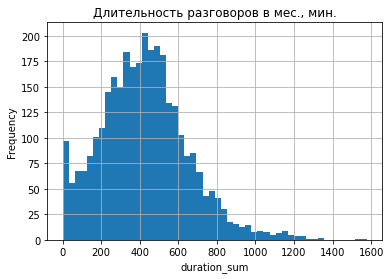

Характеристика показателя Кол-во сообщений в мес.
count    3214.000000
mean       38.281269
std        36.148326
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: messages_count, dtype: float64


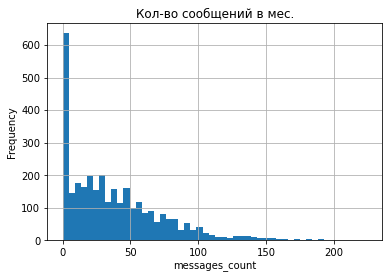

Характеристика показателя Использовано трафика в мес., мб.
count     3214.000000
mean     17207.612859
std       7570.958771
min          0.000000
25%      12491.890000
50%      16943.175000
75%      21424.625000
max      49745.690000
Name: mb_used_sum, dtype: float64


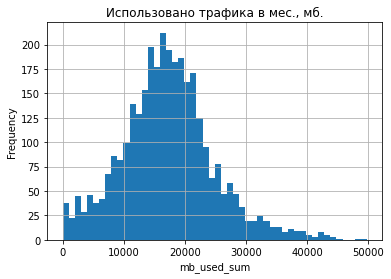

In [77]:
column_list = ['duration_sum', 'messages_count', 'mb_used_sum']
#создаём словарь имя столбца - название для диаграммы
title_list = {'duration_sum': 'Длительность разговоров в мес., мин.', 'messages_count': 'Кол-во сообщений в мес.',
              'mb_used_sum': 'Использовано трафика в мес., мб.'}
#создаём цикл, который проходит по всем названием столбцов и создаёт по ним гистограммы,
#затем из словаря выбираем в соответствие название
for element in column_list:
    print('Характеристика показателя', title_list[element])
    print(united_table[element].describe())
    result = united_table[element].plot(kind = 'hist', bins = 50, grid = True)
    plt.xlabel(element)
    plt.title(title_list[element])
    plt.show()

Мы сформировали единую таблицу с информацией о том, как каждый из пользователей пользовался тарифом. Заметно, что часть клиентов не использует возможность отправки смс. 

- Средняя длительность разговоров в месяц - 426 мин., медианная - 418 мин.
- Среднее количество смс в месяц - 38, медианное - 30
- Среднее количество мб трафика - 17207, медианное - 16943

Рассмотрим ежемесячный доход, который мы получаем от клиентов, в зависимости от тарифа.

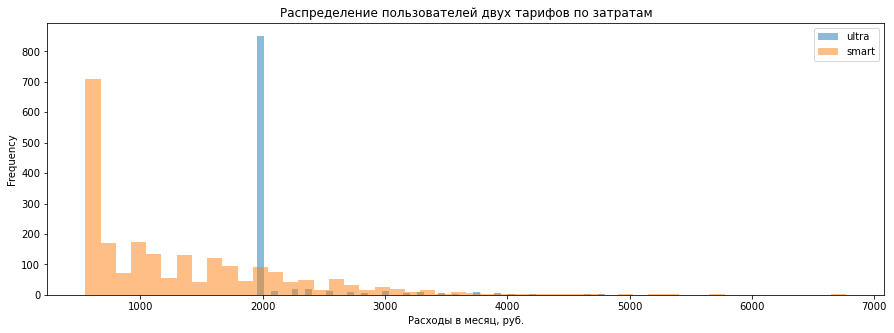

In [53]:
united_table[united_table['tariff'] == 'ultra']['revenue'].plot(kind = 'hist', bins = 50, alpha = 0.5, figsize =(15, 5))
united_table[united_table['tariff'] == 'smart']['revenue'].plot(kind = 'hist', bins = 50, alpha = 0.5)
plt.title('Распределение пользователей двух тарифов по затратам')
#plt.ylim(0, 700)
plt.xlabel('Расходы в месяц, руб.')
plt.legend(('ultra', 'smart'))

In [55]:
print('Общий доход по тарифу Ультра')
print(united_table[united_table['tariff'] == 'ultra']['revenue'].sum())
print('Общий доход по тарифу Смарт')
print(united_table[united_table['tariff'] == 'smart']['revenue'].sum())

Общий доход по тарифу Ультра
2040000.0
Общий доход по тарифу Смарт
2885751.0


In [54]:
print('Характеристики дохода по тарифу Ультра')
print(united_table[united_table['tariff'] == 'ultra']['revenue'].describe())
print()
print('Характеристики дохода по тарифу Смарт')
print(united_table[united_table['tariff'] == 'smart']['revenue'].describe())

Характеристики дохода по тарифу Ультра
count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

Характеристики дохода по тарифу Смарт
count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64


Мы видим, что клиенты тарифа "Смарт" чаще выходят за абонентскую плату, чем клиенты на тарифе "Ультра", которые, в 75% случаев не выходят за лимиты. 

Среднемесячная доходность с одного клиента на тарифе "Смарт" - 1294 руб., "Ультра" - 2071 руб.

Попробуем выяснить, по каким показателям люди чаще нарушают лимиты:

In [61]:
print('Тариф "Смарт"')
print('Доля записей, где был превышен лимит трафика:')
print(united_table[(united_table['tariff'] == 'smart') & (
    united_table['mb_round_sum'] > united_table[
        'mb_per_month_included'])]['mb_round_sum'].count()/len(
    united_table[united_table['tariff'] == 'smart']['tariff']))
print('Доля записей, где был превышен лимит минут:')
print(united_table[(united_table['tariff'] == 'smart') & (
    united_table['duration_round_sum'] > united_table[
        'minutes_included'])]['duration_round_sum'].count()/len(
    united_table[united_table['tariff'] == 'smart']['tariff']))
print('Доля записей, где был превышен лимит смс:')
print(united_table[(united_table['tariff'] == 'smart') & (
    united_table['messages_count'] > united_table[
        'messages_included'])]['messages_count'].count()/len(
    united_table[united_table['tariff'] == 'smart']['tariff']))

Тариф "Смарт"
Доля записей, где был превышен лимит трафика:
0.5872588604755495
Доля записей, где был превышен лимит минут:
0.3382682817406909
Доля записей, где был превышен лимит смс:
0.253028263795424


In [62]:
print('Тариф "Ультра"')
print('Доля записей, где был превышен лимит трафика:')
print(united_table[(united_table['tariff'] == 'ultra') & (
    united_table['mb_round_sum'] > united_table[
        'mb_per_month_included'])]['mb_round_sum'].count()/len(
    united_table[united_table['tariff'] == 'ultra']['tariff']))
print('Доля записей, где был превышен лимит минут:')
print(united_table[(united_table['tariff'] == 'ultra') & (
    united_table['duration_round_sum'] > united_table[
        'minutes_included'])]['duration_round_sum'].count()/len(
    united_table[united_table['tariff'] == 'ultra']['tariff']))
print('Доля записей, где был превышен лимит смс:')
print(united_table[(united_table['tariff'] == 'ultra') & (
    united_table['messages_count'] > united_table[
        'messages_included'])]['messages_count'].count()/len(
    united_table[united_table['tariff'] == 'ultra']['tariff']))

Тариф "Ультра"
Доля записей, где был превышен лимит трафика:
0.13604060913705585
Доля записей, где был превышен лимит минут:
0.0
Доля записей, где был превышен лимит смс:
0.0


Из анализа мы видим, что клиенты, выбравшие тариф "Смарт" в среднем менее дисципилинированы, чем клиенты с тарифом "Ультра".  При этом заметно, что количество трафика, включенного в лимит тарифа "Смарт", было превышено в **59%** наблюдений. Лимиты по минутам и смс клиенты нарушали заметно меньше.

### Вывод <a id=info6></a>

Была сформирована таблица **united_table**, содержащая данные, сгруппированные по id клиента и месяцу. Мы выявили следующие характеристики пользовательской базы:

- Средняя длительность разговоров в месяц - 426 мин., медианная - 418 мин.
- Среднее количество смс в месяц - 38, медианное - 30
- Среднее количество мб трафика - 17207, медианное - 16943

Клиенты тарифа смарт принесли за год - 2040 тыс. руб.
Тарифа ультра - 2886 тыс. руб.

В среднем клиенты на тарифе "Смарт" менее дисциплинированы и часто превышают лимиты (по интернет трафику превышение лимита было обнаружено в 59% случаев).

Проведём более подробный анализ поведения клиентов в зависимости от тарифного плана.

### 4. Анализ поведения клиентов <a id=info7></a>

Рассмотрим характеристики показателей в зависимости от тарифа. Мы исследуем 3 параметра:

- Количество минут разговора
- Количество сообщений
- Объем интернет-трафика

#### 1. Минуты разговора <a id=info8></a>
Для начала сформируем функцию, которая будет выводить сравнительные показатели по двум тарифам в выборке.

In [85]:
#Формируем 2 фрейма, где сохраняем данные по тарифам
ultra = united_table.query('tariff == "ultra"')
smart = united_table.query('tariff == "smart"')

In [89]:
# вспомогательная функция, которая рассчитывает лимиты по квантилям для дальнейшей их подстановки в качестве
#лимита выборки
def quantile_range_count(frame, column):
    q1 = frame[column].quantile(0.25)
    q3 = frame[column].quantile(0.75)
    iqr = q3 - q1
    upper_range = q3+1.5*iqr
    if (q1-1.5*iqr)<0:
     #поскольку у нас было некоторое количество нулевых значений, то попробуем взглянуть на фрейм без них
        low_range = 0.1
    else:
        low_range = q1-1.5*iqr
    return upper_range, low_range

In [142]:
def quantile_hist(frame1, frame2, column_name, name_frame1, name_frame2 , describtion): 
    #принимает название двух фреймов, имя показателя, 2 имени для использования в подписях данных и 
    #наименование показателя для подписи в диаграмме
    
    #для отбора выбивающихся значений формируем гистограмму с ограничением - слева q1-1.5*iqr, справа q3+1.5*iqr
    frame_col_1 = frame1[column_name]
    frame_col_2 = frame2[column_name]
    #вызываем функцию quantile_range_count для расчета границ распределения
    low_range_1 = quantile_range_count(frame1, column_name)[1]
    upper_range_1 = quantile_range_count(frame1, column_name)[0]
    #формируем 2 фрейма - 
    real_query_1 = frame1.query('@low_range_1 <= @frame_col_1 <= @upper_range_1')
    upper_range_2 = quantile_range_count(frame2, column_name)[0]
    low_range_2 = quantile_range_count(frame2, column_name)[1]
    real_query_2 = frame2.query('@low_range_2 <= @frame_col_2 <= @upper_range_2')
    print('Характеристики', name_frame1, 'без выбросов')
    print(real_query_1[column_name].describe())
    print()
    #расчет дисперсии производим с ddof = 1, т.к. мы работаем не со всей совокупностью пользователей, а с выборкой
    print('Дисперсия:', np.var(real_query_1[column_name], ddof =1))
    print()
    print('Характеристики', name_frame2, 'без выбросов')
    print(real_query_2[column_name].describe())
    print()
    print('Дисперсия:', np.var(real_query_2[column_name], ddof =1))
    #выводим 2 гистограммы
    result_1 = frame_col_1.plot(kind = 'hist', bins = 100, range = (low_range_1,upper_range_1)
                         , figsize = (12,6), sharex = False, grid = True, alpha = 0.5)
   
    result_2 = frame_col_2.plot(kind = 'hist', bins = 100, range = (low_range_2,upper_range_2)
                         , figsize = (12,6), sharex = False, grid = True, alpha = 0.5)
    plt.title('Распределение без редких и нулевых значений:')
    plt.legend((name_frame1, name_frame2))
    #строим прямую вертикальную линию на уровне среднего
    plt.axvline(real_query_1[column_name].mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    # делаем подпись значения среднего к этой линии
    plt.text(real_query_1[column_name].mean()*1.1, max_ylim*0.9, 'Mean ultra: {:.2f}'.format(
        real_query_1[column_name].mean()))
    plt.axvline(real_query_2[column_name].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.text(real_query_2[column_name].mean()*1.1, max_ylim*0.7, 'Mean smart: {:.2f}'.format(
        real_query_2[column_name].mean()))
    plt.xlabel(describtion)
    plt.show()
    
    
    
#формируем фрейм со средними значениями, которые выводим на график в виде двух колонок
    comparison_hist = pd.DataFrame({name_frame1: [real_query_1[column_name].mean()], name_frame2: [real_query_2[column_name].mean()]})        
    comparison_hist.plot(kind = 'bar',figsize = (4,4), grid = True)
    plt.title('Сравнение средних')
    plt.xlabel(describtion)
    plt.show()

    #формируем фрейм со стандартними отклонениями, которые выводим на график в виде двух колонок
    comparison_hist_2 = pd.DataFrame({name_frame1: [np.std(real_query_1[column_name])], name_frame2: [np.std(real_query_2[column_name])]})        
    comparison_hist_2.plot(kind = 'bar',figsize = (4,4), grid = True)
    plt.title('Сравнение стандартных отклонений')
    plt.xlabel(describtion)
    plt.show()

In [146]:
def comparison(column_name, describtion): 
    #функция, выдающая краткую сравнительную сводку по показателям двух тарифов
    
    ultra = united_table.query('tariff == "ultra"')
    smart = united_table.query('tariff == "smart"')
    name_frame1 = 'Тариф Ультра'
    name_frame2 = 'Тариф Смарт'
    #выаодим характеристики двух фреймов
    print('Характеристика', name_frame1, 'по показателю', describtion)
    print(ultra[column_name].describe())
    print()
    #производим расчет дисперсии
    print('Дисперсия:', np.var(ultra[column_name], ddof =1))
    print()
    print('Характеристика', name_frame2, 'по показателю', describtion)
    print(smart[column_name].describe())
    print()
    print('Дисперсия:', np.var(smart[column_name], ddof =1))
    print()
    print('Разброс значений без 2,5% с начала и конца выборки:')
    print(name_frame1)
    print('97,5% значений показателя', describtion, 'больше {:.2f}'.format(ultra[column_name].quantile(0.025)))
    print('2,5% значений показателя', describtion, 'больше {:.2f}'.format(ultra[column_name].quantile(0.975)))
    print()                                                               
    print(name_frame2)
    print('97,5% значений показателя', describtion, 'больше {:.2f}'.format(smart[column_name].quantile(0.025)))
    print('2,5% значений показателя', describtion, 'больше {:.2f}'.format(smart[column_name].quantile(0.975)))
    #создаём гистограмму по всем значениям
    result_1 = ultra[column_name].plot(kind = 'hist', bins = 100
                                       , figsize = (12,6), sharex = False, grid = True, alpha = 0.5)
   
    result_2 = smart[column_name].plot(kind = 'hist', bins = 100
                         , figsize = (12,6), sharex = False, grid = True, alpha = 0.5)
    plt.title('Распределение в рамках тарифов:')
    plt.legend((name_frame1, name_frame2))
    #строим вертикальную линию на уровне среднего
    plt.axvline(ultra[column_name].mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    #задаём подпись к линии среднего
    plt.text(ultra[column_name].mean()*1.1, max_ylim*0.9, 'Mean ultra: {:.2f}'.format(
       ultra[column_name].mean()))
    plt.axvline(smart[column_name].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.text(smart[column_name].mean()*1.1, max_ylim*0.7, 'Mean smart: {:.2f}'.format(
        smart[column_name].mean()))
    plt.xlabel(describtion)
    plt.show()
    #Выводим характеристики по обрезанным значениям, вызывая ранее созданную функцию
    quantile_hist(ultra, smart, column_name, name_frame1, name_frame2, describtion)


После того, как мы создали функцию, рассмотрим количество потраченных минут в месяц. При этом в расчете используем нецелое количество минут, что позволит избежать искажений, вызванных округлением вверх.

Характеристика Тариф Ультра по показателю Длительность звонков за месяц, мин.
count     985.000000
mean      497.068223
std       299.904152
min         0.000000
25%       267.750000
50%       488.100000
75%       711.470000
max      1578.060000
Name: duration_sum, dtype: float64

Дисперсия: 89942.5003695031

Характеристика Тариф Смарт по показателю Длительность звонков за месяц, мин.
count    2229.000000
mean      394.427026
std       179.962207
min         0.000000
25%       267.230000
50%       397.980000
75%       515.070000
max      1354.220000
Name: duration_sum, dtype: float64

Дисперсия: 32386.395978716126

Разброс значений без 2,5% с начала и конца выборки:
Тариф Ультра
97,5% значений показателя Длительность звонков за месяц, мин. больше 0.00
2,5% значений показателя Длительность звонков за месяц, мин. больше 1142.83

Тариф Смарт
97,5% значений показателя Длительность звонков за месяц, мин. больше 45.37
2,5% значений показателя Длительность звонков за месяц, мин. больше 735.34

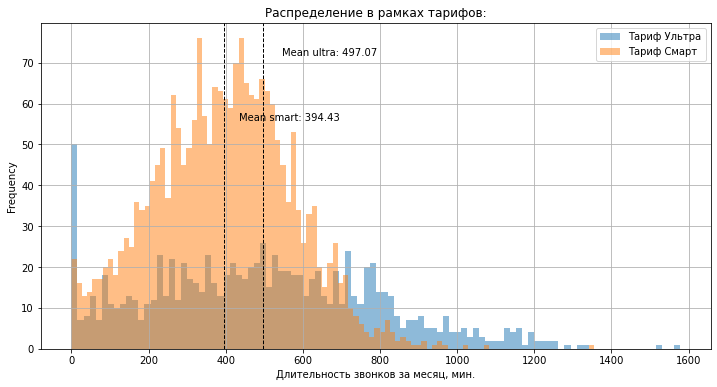

Характеристики Тариф Ультра без выбросов
count     945.000000
mean      514.820836
std       284.828948
min         0.100000
25%       294.270000
50%       498.550000
75%       714.580000
max      1337.830000
Name: duration_sum, dtype: float64

Дисперсия: 81127.5296057624

Характеристики Тариф Смарт без выбросов
count    2211.000000
mean      393.109204
std       174.197547
min         1.370000
25%       268.110000
50%       397.780000
75%       513.570000
max       881.740000
Name: duration_sum, dtype: float64

Дисперсия: 30344.785342352465


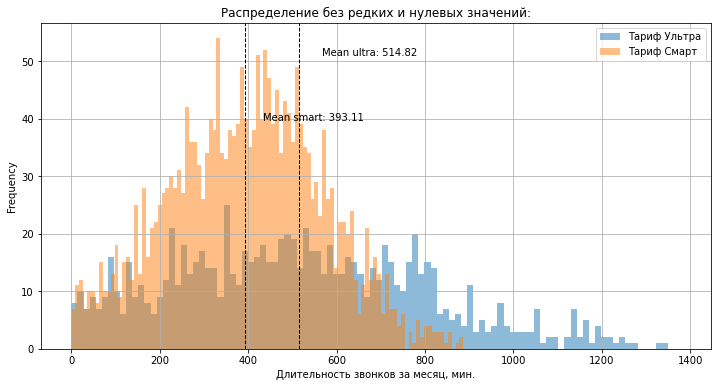

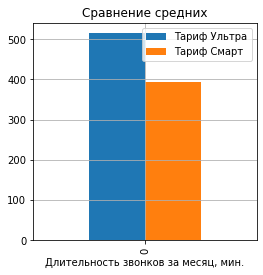

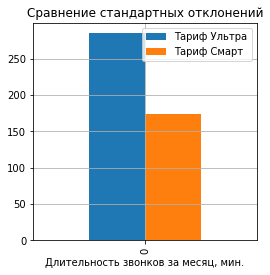

In [147]:
comparison('duration_sum', 'Длительность звонков за месяц, мин.')

Мы видим следующие характеристики тарифов:
"Ультра" 

- среднее кол-во минут разговора в месяц - 497 (без выбросов - 514)
- стандартное отклонение - 300 (без выбросов - 285)
- дисперсия - 89942 (без выбросов - 81127)

"Смарт"

- среднее кол-во минут разговора в месяц - 394 (без выбросов - 393)
- стандартное отклонение - 180 (без выбросов - 174)
- дисперсия - 32386 (без выбросов - 30344)

Мы видим, что на тарифе "Смарт" клиенты стараются не выходить за лимит в 500 минут. Также на данном тарифе гораздо меньше разброс по количеству потраченных минут, что мы видим по величине стандартного отклонения. Распределение по данному показателю на тарифе "Смарт" похоже на нормальное.

Клиенты тарифа "Ультра", похоже, выбирают данных тариф, не ради голосовой связи. Мы не видим ни одного случая, когда бы кто-либо превысил лимит в 3000 минут. И в целом высокое стандартное отклонение - около 300 минут при среднем в 500 минут отражает высокий разброс в характере использования голосовой связи. По гистограмме мы видим, что значения распределены практически равномерно и нет какого-либо преобладающего паттерна поведения.

#### 2. Кол-во отправляемых сообщений <a id=info9></a>

Переходим к рассмотрению количества сообщений.

Характеристика Тариф Ультра по показателю Кол-во отправленных сообщений в месяц
count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

Дисперсия: 2285.2661425446818

Характеристика Тариф Смарт по показателю Кол-во отправленных сообщений в месяц
count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

Дисперсия: 796.8129584480083

Разброс значений без 2,5% с начала и конца выборки:
Тариф Ультра
97,5% значений показателя Кол-во отправленных сообщений в месяц больше 0.00
2,5% значений показателя Кол-во отправленных сообщений в месяц больше 162.00

Тариф Смарт
97,5% значений показателя Кол-во отправленных сообщений в месяц больше 0.00
2,5% значений показателя Кол-во отправленных сообщений в месяц больше

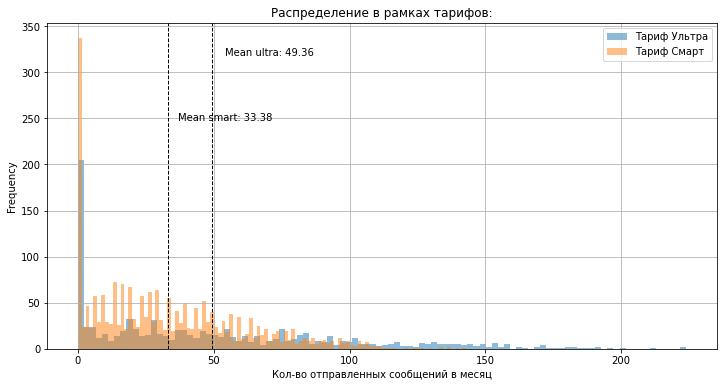

Характеристики Тариф Ультра без выбросов
count    787.000000
mean      59.714104
std       43.829688
min        1.000000
25%       24.000000
50%       50.000000
75%       85.000000
max      188.000000
Name: messages_count, dtype: float64

Дисперсия: 1921.0415692664833

Характеристики Тариф Смарт без выбросов
count    1908.000000
mean       38.059748
std        25.749521
min         1.000000
25%        17.000000
50%        33.000000
75%        55.000000
max       112.000000
Name: messages_count, dtype: float64

Дисперсия: 663.0378545774754


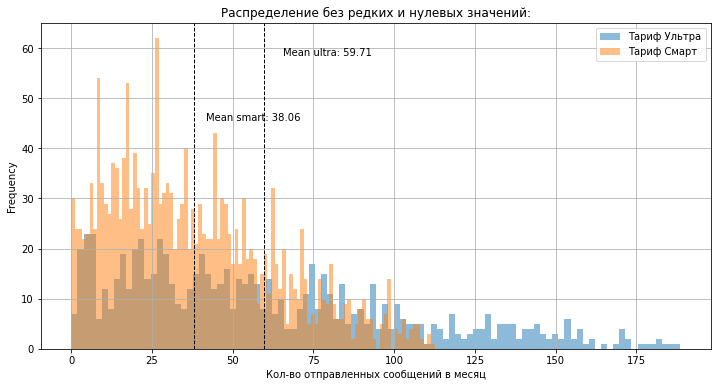

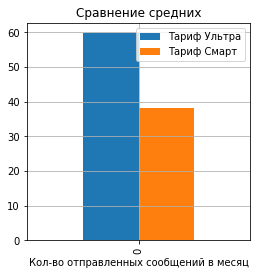

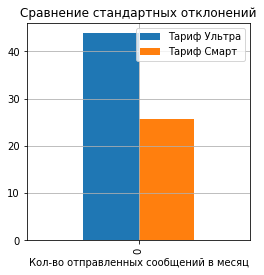

In [148]:
comparison('messages_count', 'Кол-во отправленных сообщений в месяц')

По количеству отправленных сообщений мы можем выделить следующие характеристики тарифов:
"Ультра" 

- среднее кол-во смс в месяц - 49 (без выбросов - 60)
- стандартное отклонение - 47,8 (без выбросов - 43,8)
- дисперсия - 2285 (без выбросов - 1921)

"Смарт"

- среднее кол-во смс в месяц - 33 (без выбросов - 38)
- стандартное отклонение - 28,2 (без выбросов - 25,7)
- дисперсия - 796 (без выбросов - 663)

Мы видим, что смс не пользуются популярностью среди клиентов. В существенном количестве случаев на тарифах не было отправлено ни одного сообщения в месяц.

Если отбросить нули и экстремально высокие значения, то мы видим, что клиенты на тарифе "Ультра" вновь демонстрируют стремление не выходить за лимитв 50 сообщений, тогда как среди людей на тарифе "Смарт" единства меньше.

Распределение на тарифе "Смарт" скошено вправо. На тарифе "Ультра" же сложно выделить единый паттерн поведения клиентов - количество отправленных смс практически равномерно распределено по оси иск.

#### 3. Интернет-трафик <a id=info10></a>

Перейдём к рассмотрению интернет-трафика. Как мы выяснили ранее, пользователи на тарифе "Смарт" очень часто превышают лимит. Выясним, как это отразиться в распределении по использованным данным.

Характеристика Тариф Ультра по показателю Использовано трафика, мб.
count      985.000000
mean     19468.805208
std      10087.170752
min          0.000000
25%      11770.260000
50%      19308.010000
75%      26837.690000
max      49745.690000
Name: mb_used_sum, dtype: float64

Дисперсия: 101751013.78335372

Характеристика Тариф Смарт по показателю Использовано трафика, мб.
count     2229.000000
mean     16208.386990
std       5870.476681
min          0.000000
25%      12643.010000
50%      16506.840000
75%      20042.930000
max      38552.450000
Name: mb_used_sum, dtype: float64

Дисперсия: 34462496.46274239

Разброс значений без 2,5% с начала и конца выборки:
Тариф Ультра
97,5% значений показателя Использовано трафика, мб. больше 1549.69
2,5% значений показателя Использовано трафика, мб. больше 39945.65

Тариф Смарт
97,5% значений показателя Использовано трафика, мб. больше 2860.60
2,5% значений показателя Использовано трафика, мб. больше 27148.55


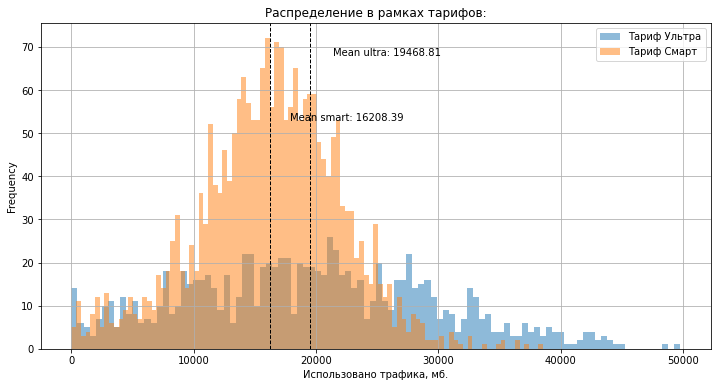

Характеристики Тариф Ультра без выбросов
count      973.000000
mean     19657.787708
std       9886.296975
min        365.090000
25%      12049.890000
50%      19394.290000
75%      26865.250000
max      48351.590000
Name: mb_used_sum, dtype: float64

Дисперсия: 97738867.87517263

Характеристики Тариф Смарт без выбросов
count     2192.000000
mean     16255.878504
std       5512.790122
min       1600.280000
25%      12756.567500
50%      16538.345000
75%      20014.260000
max      31077.480000
Name: mb_used_sum, dtype: float64

Дисперсия: 30390854.932458185


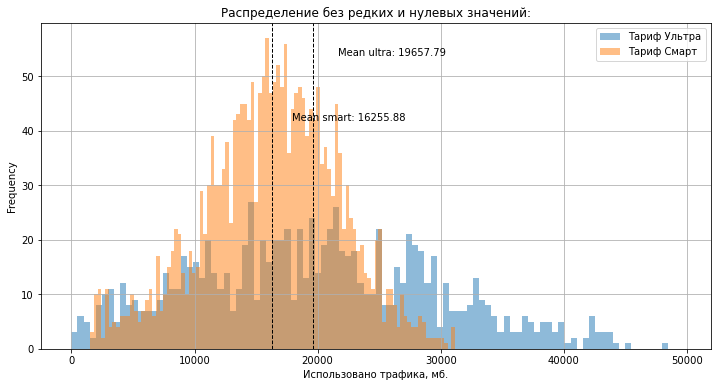

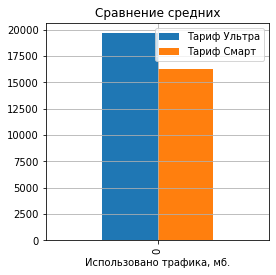

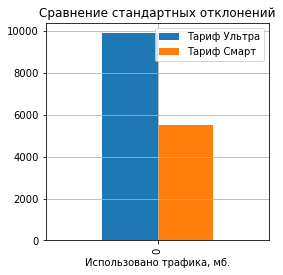

In [149]:
comparison('mb_used_sum', 'Использовано трафика, мб.')

In [151]:
print('Доля выходов за лимит + 9 гб:'
      ,smart[smart['mb_used_sum'] > 24*1024]['mb_used_sum'].count()/len(smart['mb_used_sum']))

Доля выходов за лимит + 9 гб: 0.0677433826828174


По объему трафика мы можем выделить следующие характеристики тарифов:

"Ультра" 

- среднее кол-во мб в месяц - 19468 (без выбросов - 19658)
- стандартное отклонение - 10087 (без выбросов - 9886)
- дисперсия - 101751013 (без выбросов - 97738867)

"Смарт"

- среднее кол-во мб в месяц - 16208 (без выбросов - 16255)
- стандартное отклонение - 5870 (без выбросов - 5512)
- дисперсия - 34462496 (без выбросов - 663)

Мы видим, что в среднем пользователям тарифа "Смарт" не хватает заложенного в тариф пакета трафика и в более чем половине случаев используется хотя бы 1 дополнительный гб. При этом часть клиентов (**6,7% случаев**) настолько выходит за лимит, что им выгоднее было бы перейти на тариф "Ультра".
В целом распределение использования трафика на тарифе "Смарт" похоже на нормальное. Тогда как на тарифе "Ультра" мы опять фиксируем больший разброс в значениях исследуемого показателя.

### Вывод <a id=info11></a>

Мы выявили следующие характеристики тарифов:

#### "Ультра" 

**Разговоры**

- среднее кол-во минут разговора в месяц - 497 (без выбросов - 514)
- стандартное отклонение - 300 (без выбросов - 285)
- дисперсия - 89942 (без выбросов - 81127)

**Сообщения**

- среднее кол-во смс в месяц - 49 (без выбросов - 60)
- стандартное отклонение - 47,8 (без выбросов - 43,8)
- дисперсия - 2285 (без выбросов - 1921)

**Интернет**

- среднее кол-во мб в месяц - 19468 (без выбросов - 19658)
- стандартное отклонение - 10087 (без выбросов - 9886)
- дисперсия - 101751013 (без выбросов - 97738867)

#### "Смарт"

**Разговоры**

- среднее кол-во минут разговора в месяц - 394 (без выбросов - 393)
- стандартное отклонение - 180 (без выбросов - 174)
- дисперсия - 32386 (без выбросов - 30344)

**Сообщения**

- среднее кол-во смс в месяц - 33 (без выбросов - 38)
- стандартное отклонение - 28,2 (без выбросов - 25,7)
- дисперсия - 796 (без выбросов - 663)

**Интернет**

- среднее кол-во мб в месяц - 16208 (без выбросов - 16255)
- стандартное отклонение - 5870 (без выбросов - 5512)
- дисперсия - 34462496 (без выбросов - 663)

Наиболее востребованной услугой является пакет интернет-трафика, наименее востребованной - смс-сообщения. В среднем клиенты тарифа "Смарт" общаются больше, однако почти никогда не выходят за лимит.

Среднее значение использованного трафика по тарифам отличается на 20% в пользу тарифа "Ультра". Однако на тарифе "Смарт" люди в среднем склонны превышать лимит трафика.

Поведение клиентов двух тарифов характеризуется следующими отличиями:
- в среднем люди на тарифе "Смарт" стараются максимально полно использовать пакеты услуг, заложенные в абонентскую плату
- клиенты на тарифе "Ультра" крайне редко выходят за лимиты (только по интернет-трафику)
- на тарифе "Ультра" по всем трём показателям мы обнаружили очень большие стандартные отклонения, т.е. вариаций поведения клиента может быть много, в отличие от тарифа "Смарт"
- по косвенным признакам можно предположить, что клиенты на тарифе "Ультра" представляют собой более обеспеченный слой населения, который не настроен получать максимальную "отдачу" от пакетов, входящих в абонентскую плату.

### 5. Проверка гипотез <a id=info12></a>

Необходимо исследовать следующие гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

#### 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Для проверки данного утверждения сформулируем гипотезы:
**Н0**: средняя выручка пользователей тарифов "Ультра" и "Смарт" одинакова. M(Ultra) = M(Smart)

Альтернативная гипотеза **H1**: средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

Поскольку мы исследуем гипотезу о равенстве средних и количество наблюдений в выборках более 50, то для проверки достоверности гипотезы мы будем использовать t-тест - t-критерий Стьюдента. Уровень статистической значимости установим на значении 0.05.

In [156]:
#используем ранее заданные фреймы ultra и smart
test_result = st.ttest_ind(ultra['revenue'], smart['revenue'])
alpha = 0.05
if test_result.pvalue > alpha:
    print('p-value:', test_result.pvalue)
    print('Нет оснований, чтобы отвергнуть нулевую гипотезу')
if test_result.pvalue < alpha:
    print('p-value:', test_result.pvalue)
    print('Есть основания, чтобы отвергнуть нулевую гипотезу')

p-value: 2.9776448000521676e-158
Есть основания, чтобы отвергнуть нулевую гипотезу


Мы получили очень маленькое значение p-value для гипотезы H0, таким образом у нас есть основания предположить, что на генеральной совокупности средняя выручка пользователей двух тарифов различается.

#### 2. Средняя выручка пользователей из Москвы отличается от средней выручки пользователей в других регионах

Сформулируем нулевую гипотезу 
H0: средняя выручка пользователей из Москвы и регионов одинакова. M(moscow) = M (regions)
Альтернативная гипотеза H1: средняя выручка пользователей Москвы и регионов отличается

Также воспользуемся t-тестом:

In [157]:
#сформируем массивы по выручке в Москве и регионах
moscow = united_table.query('city == "Москва"')
regions = united_table.query('city != "Москва"')
alpha = 0.05
test_result = st.ttest_ind(moscow['revenue'], regions['revenue'])
if test_result.pvalue > alpha:
    print('p-value:', test_result.pvalue)
    print('Нет оснований, чтобы отвергнуть нулевую гипотезу')
if test_result.pvalue < alpha:
    print('p-value:', test_result.pvalue)
    print('Есть основания, чтобы отвергнуть нулевую гипотезу')

p-value: 0.531666503831252
Нет оснований, чтобы отвергнуть нулевую гипотезу


p-value - 0.53, достаточно большая величина, чтобы не было оснований отвергнуть нулевую гипотезу. Т.е. можем предположить, что на генеральной совокупности средняя выручка по москве и регионам существенно не отличается.

### Вывод <a id=info13></a>

Мы проверили две гипотезы о генеральной совокупности. После данной проверки можно сделать следующие выводы:

1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" отличается
2. Средняя выручка пользователей из Москвы и регионов не отличается

### Общий вывод <a id=info14></a>

В ходе анализа мы исследовали два тарифа компании "Мегалайн" - "Ультра" и "Смарт".

Тарифы обладают следующими характеристиками:

#### "Ультра"

- среднее кол-во минут разговора в месяц - 497 (без выбросов - 514)
- среднее кол-во смс в месяц - 49 (без выбросов - 60)
- среднее кол-во мб в месяц - 19468 (без выбросов - 19658)


#### "Смарт"

- среднее кол-во минут разговора в месяц - 394 (без выбросов - 393)
- среднее кол-во смс в месяц - 33 (без выбросов - 38)
- среднее кол-во мб в месяц - 16208 (без выбросов - 16255)

Мы обнаружили следующие особенности поведения клиентов двух тарифов:

- "Смарт" - максимальное использование пакетов услуг в рамках абонентской платы, в 59% случаев происходит дополнительная покупка хотя бы 1 гб. траффика., в 39% случав произошел выход за лимит длительности разговоров.
- "Ультра" - активность клиентов сильно диверсифицирована. При средних значениях, превышающих аналогичные показатели для тарифа "Смарт", прогнозировать поведение пользователей сложнее, так как разброс значений очень высок. 

Среднемесячная доходность с одного клиента на тарифе "Смарт" - **1294 руб.**, "Ультра" - **2071 руб.** (исследование статистической гипотезы показало, что разрыв в средней выручке с большой вероятностью присутствует в генеральной совокупности)
Средняя выручка от одного клиента в регионах и г. Москва с большой вероятностью не будет иметь существенных отличий на генеральной совокупности.

Также стоит обратить внимание, что наиболее востребованной является услуга по предоставлению **Интернет-трафика**, а наименее востребованной **Смс-сообщения**, т.к. они практически полностью вытеснены мессенджерами.